## Spaceship titanic

### Analiza Zadania
Zadaniem jest przewidziec czy pasażerowie zostali przetransportowani 
Mam do czynienia z uczeniem nadzorowanym w którym wykorzystujemy dane wejsciowe z etykietami aby nauczyc model przewiwywac wynik dla nowych danych
Zadanie to jest przykładem klasyfikacji binarnej która przewiduje jedna z dwóch klas 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sample_submission = pd.read_csv("../input/sample_submission.csv")

## Analiza danych

In [6]:
train.sample(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1035,1100_03,Mars,False,F/226/P,TRAPPIST-1e,18.0,False,787.0,0.0,106.0,1710.0,0.0,Cireal Cuche,False


In [7]:
train.shape

(8693, 14)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [12]:
test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
1832,3893_01,Mars,False,F/734/S,TRAPPIST-1e,68.0,False,2466.0,0.0,205.0,0.0,0.0,Toate Casty
3637,7927_02,Earth,True,G/1282/P,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Dian Bertsontry
1490,3198_01,Mars,False,F/604/S,TRAPPIST-1e,29.0,NaN,168.0,2.0,45.0,2405.0,3.0,Cruts Tité
1783,3802_01,Earth,False,F/781/P,TRAPPIST-1e,21.0,False,136.0,0.0,3.0,0.0,1206.0,Lina Nichoan
2268,4935_02,Earth,True,G/796/P,PSO J318.5-22,36.0,False,0.0,0.0,0.0,0.0,0.0,Bethew Whitneyes


In [13]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### Wnioski z analizy
Dane zawierają 14 kolumn i 8693 wierszy
Dane sa zróznicowane z pod kątem typów:
- 7 kolumn zawiera ty tanych 'object' który moze zawierac dowolna wartosc, pop przejrzeniu przykłądowych danych sa to napisy
- 6 cech to watosci zmienno przecinkowe
- 1 cecha to wartosc boolowska (true/false)

Duzo wartosc jest pustych 

Wartoscii kategoryczne znajduja sie w kolumnach:
- HomePlanet (Earth,Europa,Mars)
- CryoSleep znajduje sie True/False
- Destination (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)
- VIP  znajduje sie True/Flase)

Cecha PassengerId to unikalny identyfikator każdego pasażera. Każdy identyfikator ma formę gggg_pp, gdzie gggg oznacza grupę, z którą podróżuje pasażer, a pp to jego numer w grupie. Osoby w grupie są często członkami rodziny, ale nie zawsze.

### Wizualizacja danych

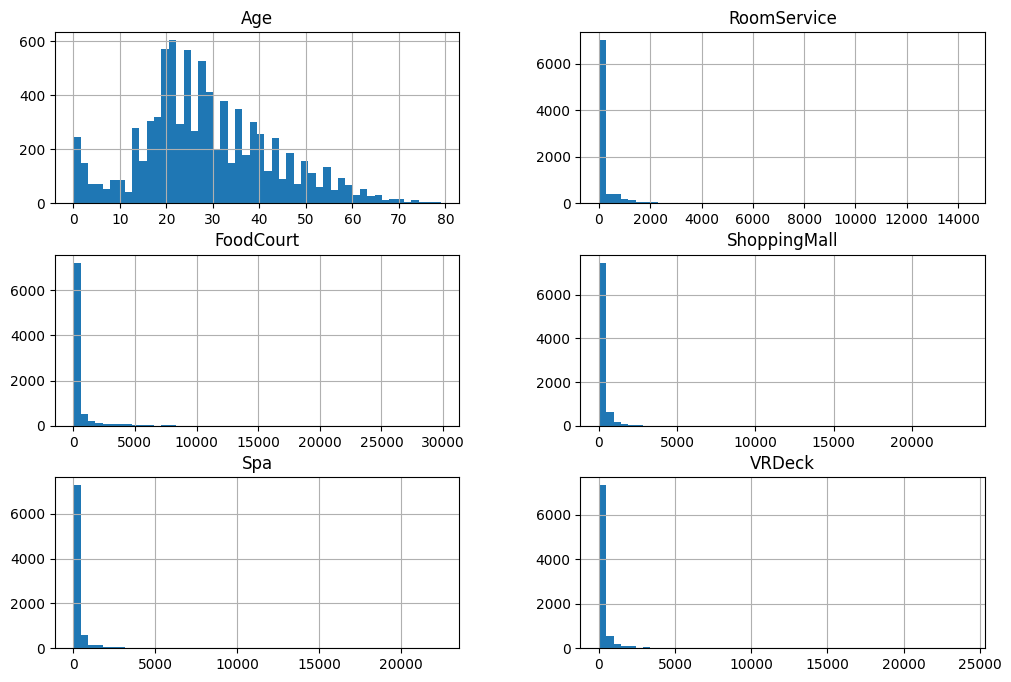

In [16]:
train.hist(bins = 50, figsize = (12,8))
plt.show()

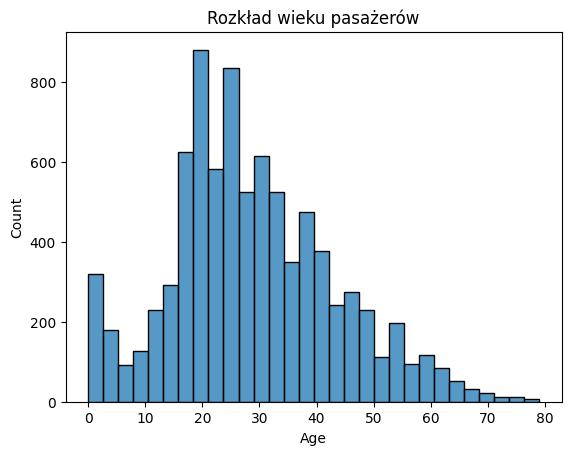

In [17]:
sns.histplot(train['Age'].dropna(), bins=30)
plt.title('Rozkład wieku pasażerów')
plt.show()

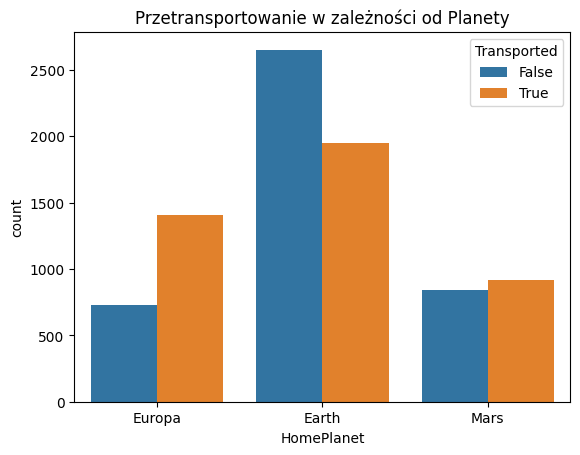

In [18]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

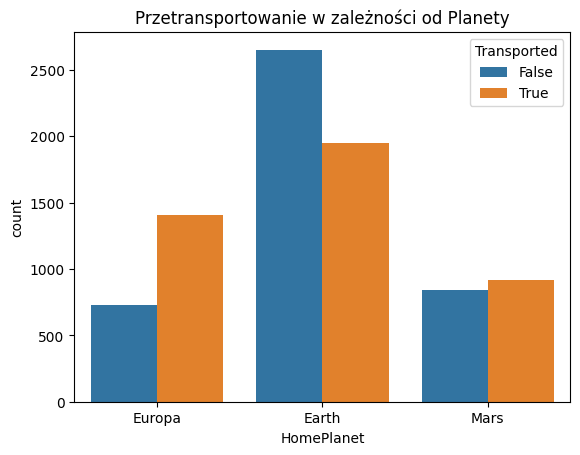

In [19]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

In [20]:
group_means = train.groupby(['HomePlanet', 'CryoSleep'])['Age'].mean()
group_means

HomePlanet  CryoSleep
Earth       False        27.412304
            True         23.027530
Europa      False        35.771253
            True         32.950395
Mars        False        29.609589
            True         28.721966
Name: Age, dtype: float64

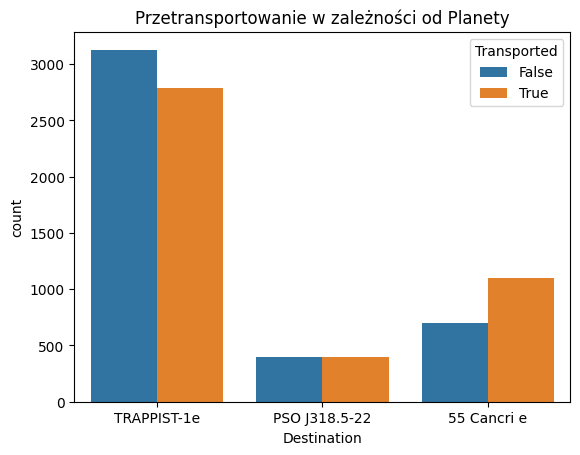

In [21]:
sns.countplot(x='Destination', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

## Przygotowanie danych

### PassengerId
Unikalny identyfikator dla każdego pasażera. Każdy identyfikator przyjmuje formę gggg_pp, gdzie ggggwskazuje grupę, z którą podróżuje pasażer i ppjest jego numerem w grupie.

Rozłozymy je na 2 osobne kolumny

In [24]:
train['PassengerId'].head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [25]:
train['GroupID']= train['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
train['GroupSize'] = train.groupby('GroupID')['PassengerId'].transform('count')
train = train.drop(columns='PassengerId')

In [26]:
test['GroupID']= test['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
test['GroupSize'] = test.groupby('GroupID')['PassengerId'].transform('count')
test = test.drop(columns='PassengerId')

### Cabin         
Numer kabiny, w której przebywa pasażer. Przyjmuje formę deck/num/side, gdzie sidemoże być zarówno Pdla portu, jak i Sdla prawej burty

Rozłozymy ja na 3 osobne kolumny

In [28]:
train['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [29]:
train[['Deck', 'Num','Side']] = train['Cabin'].str.split('/', expand = True)
train = train.drop(columns='Cabin')


In [30]:
test[['Deck', 'Num','Side']] = test['Cabin'].str.split('/', expand = True)
test = test.drop(columns='Cabin')


In [31]:
train['Deck'] = train['Deck'].fillna('None')
train['Num'] = train['Num'].fillna('-1')
train['Side'] = train['Side'].fillna('None')

In [32]:
test['Deck'] = test['Deck'].fillna('None')
test['Num'] = test['Num'].fillna('-1')
test['Side'] = test['Side'].fillna('None')

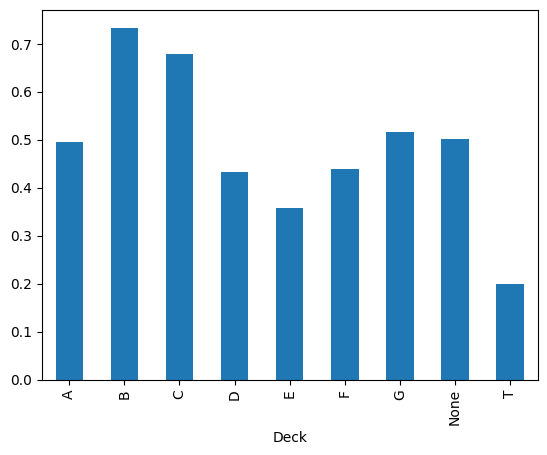

In [33]:
train.groupby('Deck')['Transported'].mean().plot(kind= 'bar');

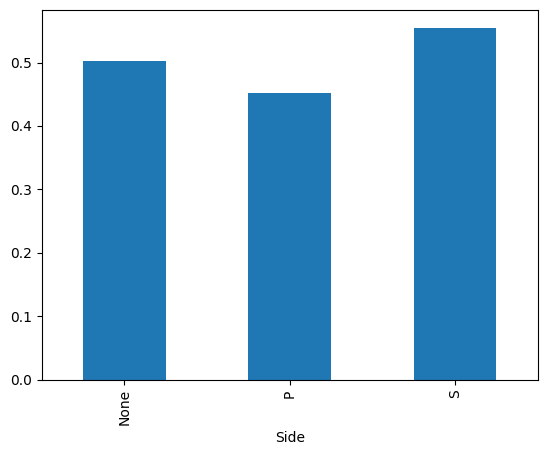

In [34]:
train.groupby('Side')['Transported'].mean().plot(kind= 'bar');

## Podział danych na kategorie

In [36]:
train = train.drop(columns=['GroupID','Name'])

In [38]:
object_train = train.dtypes[train.dtypes == 'object']
object_train.keys()

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side'], dtype='object')

In [39]:
cat_attribs = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck',
       'Side']

In [40]:
num_train = train.dtypes[train.dtypes != 'object']
num_train.keys()

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'GroupSize'],
      dtype='object')

In [41]:
num_attribs = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Num','GroupSize']

In [42]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupSize,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,F,1,S


## Pipeline

Pipeline jest to struktura która pozwala uatomatyzowac i łączyc różne etapy przetwarzenia danych

In [44]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer

In [45]:
cat_pipeline = Pipeline(steps= [
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output= False)),
    ('impute', KNNImputer(n_neighbors= 5))
])

In [46]:
num_pipeline = Pipeline(steps= [
    ('standarize', StandardScaler()),
    ('impute', KNNImputer(n_neighbors= 5))
])

In [47]:
col_transform = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
], remainder= 'passthrough')

In [48]:
pipeline = Pipeline(steps= [
    ('preprocessing',col_transform)
])

In [49]:
X= train.drop(['Transported'],axis =1 )

y = train['Transported']

In [50]:
X_prepared = pipeline.fit_transform(X)

In [51]:
X_prepared.shape

(8693, 34)

### Sprawdzanie korelacji miedzy cechami

In [53]:
num_cols = num_attribs
cat_cols = col_transform.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_attribs)
new_column_names = np.concatenate([num_cols,cat_cols])

In [54]:
df_final = pd.DataFrame(X_prepared, columns=new_column_names)
df_final['Transported'] = train['Transported'] 
df_final.corr()['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep_True               0.460132
HomePlanet_Europa            0.176916
Deck_B                       0.144733
Destination_55 Cancri e      0.108722
Deck_C                       0.108193
Side_S                       0.101455
GroupSize                    0.082644
FoodCourt                    0.045184
VIP_False                    0.024602
HomePlanet_Mars              0.019544
Deck_G                       0.016269
ShoppingMall                 0.008468
HomePlanet_nan               0.002712
VIP_nan                      0.002688
Destination_nan              0.000547
Destination_PSO J318.5-22    0.000092
Deck_None                   -0.000340
Side_None                   -0.000340
Deck_A                      -0.002623
CryoSleep_nan               -0.004846
Deck_T                      -0.014568
Deck_D                      -0.034046
VIP_True                    -0.037261
Num                         -0.043830
Age                         -0.074059
Deck_F      

## Tworzenie modelu

In [189]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state = 42)

In [58]:
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

### LogisticRegression

In [60]:
log_reg.fit(X_train, y_train)
pred_log_reg = log_reg.predict(X_test)
accuracy_score(y_test,pred_log_reg)

0.7797584818861415

### DecisionTreeClassifier

In [62]:
dec_tree.fit(X_train, y_train)
pred_dec_tree= dec_tree.predict(X_test)
accuracy_score(y_test,pred_dec_tree)


0.7389304197814837

### RandomForestClassifier

In [64]:
rand_forest.fit(X_train,y_train)
pred_rand_forest = rand_forest.predict(X_test)
accuracy_score(y_test,pred_rand_forest)

0.7906843013225991

### XGBClassifier

In [66]:
xgb.fit(X_train, y_train)  
pred_xgb = xgb.predict(X_test)
accuracy_score(y_test, pred_xgb)

0.78953421506613

### LGBMClassifier

In [68]:
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)
accuracy_score(y_test, pred_lgbm)

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1700
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


0.8056354226566993

## GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### LogisticRegression

In [72]:
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Testowanie różnych sił regularyzacji
    'penalty': ['l1', 'l2'],  # Testowanie różnych regularyzacji
    'solver': ['liblinear', 'saga']  # Solvery wspierające L1 i L2
}

In [73]:
log_reg_cv = GridSearchCV(estimator= log_reg,
                          param_grid= param_grid_log_reg,
                          scoring='accuracy', 
                          cv=5,
                          n_jobs= -1
                         )

In [74]:
log_reg_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [75]:
print("Best Accuracy (CV):", log_reg_cv.best_score_)


Best Accuracy (CV): 0.794221433780366


In [76]:
best_log_red_cv = log_reg_cv.best_estimator_
best_log_red_cv.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [77]:
pred_log_reg_cv = best_log_red_cv.predict(X_test)

In [78]:
accuracy_score(y_test,pred_log_reg_cv)

0.7780333525014376

### DecisionTreeClassifier

In [80]:
param_grid_dec_tree = {
    'criterion': ['gini', 'entropy'],  # Funkcja oceny podziału
    'max_depth': [3, 5, 10, None],  # Maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10,15],  # Minimalna liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4],  # Minimalna liczba próbek w liściu
    'max_features': ['sqrt', 'log2', None],  # Maksymalna liczba cech używanych do podziału
    'splitter': ['best', 'random']  # Strategia podziału
}

In [81]:
dec_tree_cv = GridSearchCV(estimator= dec_tree,
                          param_grid= param_grid_dec_tree,
                          scoring='accuracy', 
                          cv=5,
                          n_jobs= -1
                         )

In [82]:
dec_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [83]:
print("Best Accuracy (CV):", dec_tree_cv.best_score_)


Best Accuracy (CV): 0.7769636253613931


In [84]:
best_dec_tree_cv = dec_tree_cv.best_estimator_
best_dec_tree_cv.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=15,
                       random_state=42)

In [85]:
pred_dec_tree_cv = best_dec_tree_cv.predict(X_test)

In [86]:
accuracy_score(pred_dec_tree_cv, y_test)

0.7556066705002875

### RandomForestClassifier

Las losowy dopasowuje szereg klasyfikatorów drzew decyzyjnych do róznych podpróbek zbioru danych i uzywa uśredniania, aby poprawic dokładność precyyzyjną i kontrolowac nadmierne dopasowanie  

In [89]:
params_gird_rand_forest= {
    'n_estimators': [100, 200, 300],  # Liczba drzew w lesie
    'max_depth': [10, 20, None],  # Maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],  # Minimalna liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4],  # Minimalna liczba próbek w liściu
    'max_features': ['sqrt', 'log2', None],  # Liczba cech do podziału w każdym węźle
    'bootstrap': [True, False],  # Czy losować próbki ze zwracaniem
    'criterion': ['gini', 'entropy']  # Funkcja oceny podziału
}

In [90]:
rand_forest_cv = GridSearchCV(
    estimator=rand_forest,
    param_grid=params_gird_rand_forest,
    cv =5,
    scoring= 'accuracy',
    n_jobs= -1
)

In [91]:
rand_forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [92]:
print("Best Accuracy (CV):", rand_forest_cv.best_score_)


Best Accuracy (CV): 0.8119073799192135


### XGBClassifier

In [94]:
param_grid_xgb = {
    'n_estimators': [100, 300, 500],  # Liczba drzew
    'max_depth': [3, 6, 10],  # Maksymalna głębokość drzewa
    'learning_rate': [0.01, 0.1, 0.2],  # Tempo uczenia
    'subsample': [0.7, 0.8, 1.0],  # Część próbek używana do trenowania
    'colsample_bytree': [0.7, 0.8, 1.0],  # Część cech używana w każdym drzewie
    'gamma': [0, 0.1, 0.2],  # Minimalny przyrost poprawy podziału
    'reg_alpha': [0, 0.01, 0.1],  # Regularyzacja L1
    'reg_lambda': [1, 1.5, 2]  # Regularyzacja L2
}

In [95]:
xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv =5,
    scoring= 'accuracy'
)

In [96]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 300, 500],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [97]:
print("Best Accuracy (CV):", xgb_cv.best_score_)


Best Accuracy (CV): 0.8167958458538704


In [ ]:
best_xgb_cv = xgb_cv.best_estimator_
best_xgb_cv.fit(X_train, y_train)


In [223]:
pred_best_xgb_cv = best_xgb_cv.predict(X_test)
accuracy_score(pred_best_xgb_cv, y_test)

0.7947096032202415

### LGBMClassifier

In [99]:
param_grid_lgbm = {
    'n_estimators': [100, 300, 500],  # Liczba drzew
    'learning_rate': [0.01, 0.05, 0.1],  # Tempo uczenia
    'num_leaves': [20, 31, 50],  # Liczba liści w drzewie
    'max_depth': [-1, 10, 20],  # Głębokość drzewa (-1 oznacza brak ograniczenia)
    'min_child_samples': [10, 20, 30],  # Minimalna liczba próbek w węźle
    'subsample': [0.7, 0.8, 1.0],  # Losowanie próbek do uczenia
    'colsample_bytree': [0.7, 0.8, 1.0],  # Część cech używana do podziału
    'reg_alpha': [0, 0.1, 0.5],  # Regularyzacja L1
    'reg_lambda': [0, 1, 2]  # Regularyzacja L2
}

In [100]:
lgbm_cv = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv =5,
    scoring= 'accuracy'
)

In [101]:
lgbm_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 300, 500],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [102]:
print("Best Accuracy (CV):", lgbm_cv.best_score_)


Best Accuracy (CV): 0.8167958458538704


## **Stacking Classifier**

StackingClassifier (klasyfikacja stosowa) to metoda zespołowa (ensemble learning), w której wyniki wielu modeli (tzw.bazowych, (base learners)) są używane jako cechy wejściowe dla modelu meta-klasyfikatora (tzw.modelu poziomu wyższego). Połącznie róznych modeli, aby uzyskać lepszą wydajność niz każdy z nich osobno

In [233]:
estimators = [
    ('log_reg',log_reg_cv.best_estimator_),
    ('dec_tree',dec_tree_cv.best_estimator_),
    ('rand_forest',rand_forest_cv.best_estimator_),
    ('lgbm',lgbm_cv.best_estimator_)
]

In [235]:
stackclf = StackingClassifier(estimators = estimators,
                              final_estimator = xgb_cv.best_estimator_,
                              verbose= 0
                             )

In [237]:
stackclf.fit(X_train, y_train)


StackingClassifier(estimators=[('log_reg',
                                LogisticRegression(C=10, penalty='l1',
                                                   random_state=42,
                                                   solver='liblinear')),
                               ('dec_tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       min_samples_split=15,
                                                       random_state=42)),
                               ('rand_forest',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       min_samples_leaf=4,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('lgbm...
                                                 feature_types=None, gamma=0.2,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

In [239]:
y_pred_stackclf = stackclf.predict(X_test)
accuracy_score(y_pred_stackclf,y_test)

0.7941345600920069

## Trenowanie modelu na danych testowych 

In [231]:
test__ = pd.read_csv("../input/test.csv")
test_processor = pipeline.transform(test)

final_pred = y_pred_stackclf.predict(test_processor)

submission = pd.DataFrame({
    'PassengerId':test__['PassengerId'],
    'Transported':final_pred
})

submission.to_csv("../output/submission_ST_04_xgb.csv", index= False)